# Emergency 911 Calls -- Exploratory Data Analysis Project 

## Table of Contents

* 1) Introduction
* 2) Import Dataset and Libraries
* 3) Analyze the Dataset
* 4)Preprocessing
   * Calss labeling
   * Data cleaning
   * Dealing with missing values
* 5) Creating New Feature
* 6) Exploratory Data Analysis (EDA)



## Introduction

911 is an emergency telephone number for the North American Numbering Plan (NANP). Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies. Considering road accidents, fire accidents etc, high numbers in specific areas indicate that there is a high demand for ambulance services in those areas. Road accidents in some areas might be due to road conditions which need to be improved. High frequency of emergencies due to respiratory problems might be due to harmful pollutants in the air in that specific area. Association rule mining will thus help in discovering such patterns. The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)by usging python and data analysis skills.
The data contains emergency calls from Montgomery County, PA from 2015 to 2020.

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Import Data and Libraries 

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# magic function for displaying image and figure in Jupyter Notebook
%matplotlib inline   

In [2]:
# read the csv file as dataframe called data_file
data_file = pd.read_csv('911 Emergency Calls Dataset.csv')

### Analyze the Dataset

In [3]:
# Information of the dataset and data types for each features
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


The dataset contain 99492 rows of data and has 9 columns of features. Data has float, integer, and object type values. Data type of timeStamp is object, so I need to conver to datetime.

In [4]:
# Top five (default) rows of the data
data_file.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Get the column names of the dataset
data_file.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

### Preprocessing

In [6]:
# drop the column 'e', which does not provide any useful information
data_file.drop('e', axis=1, inplace=True)

In [7]:
# check the missing data
print('Missing Data:', data_file.isnull().values.sum())
total = data_file.isnull().sum().sort_values(ascending=False)
percent = (data_file.isnull().sum()/data_file.isnull().values.sum()*100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Missing Data: 80492


,Total,Percent
zip,80199,99.635989
twp,293,0.364011
lat,0,0.000000
lng,0,0.000000
desc,0,0.000000
title,0,0.000000
timeStamp,0,0.000000
addr,0,0.000000


* Zip has 12855 missing values which is about 95.8% of total missing values
* addr has 519 missing values which is about 3.87% of total missing values
* twp has 43 missing values which is about 0.32% of total missing values

### Creating new features

In [8]:
# change the data type of 'timeStamp' from strings to DateTime objects
data_file['timeStamp'] = pd.to_datetime(data_file['timeStamp'])

In [9]:
# create a column for Hour
data_file['Hour'] = data_file['timeStamp'].apply(lambda time: time.hour)

In [10]:
# create a column for day of week
data_file['Day of Week'] = data_file['timeStamp'].apply(lambda time: time.dayofweek)

In [11]:
# create a column for month
data_file['Month'] = data_file['timeStamp'].apply(lambda time: time.month)

In [12]:
# create a column for year
data_file['Year'] = data_file['timeStamp'].apply(lambda time: time.year)

In [13]:
# create a column for date
data_file['Date'] = data_file['timeStamp'].apply(lambda time: time.date())

In [14]:
# use the map() method with this dictionary to map the actual string names to the day of the week
name_of_day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data_file['Day of Week'] = data_file['Day of Week'].map(name_of_day)

In [15]:
# get the station code from 'desc' column
data_file['station_code'] = data_file['desc'].str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data_file['station_code'] = data_file['station_code'].str.replace(':', '')

In [16]:
# column of the reason categories for emergency
data_file['Reason']=data_file['title'].apply(lambda title: title.split(':')[0])

In [17]:
# column of emergency detail
data_file['Detail']=data_file['title'].apply(lambda title: title.split(':')[1])

In [18]:
# Reprocessed dataset
data_file.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,Date,station_code,Reason,Detail
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,Thu,12,2015,2015-12-10,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,Thu,12,2015,2015-12-10,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,Thu,12,2015,2015-12-10,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,Thu,12,2015,2015-12-10,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,Thu,12,2015,2015-12-10,329,EMS,DIZZINESS


## Exploratory Data Analysis (EDA)

### After the data has been reprocessed ,  I do the Exploratory Data Analysis (EDA) of 911 data set to explore the data and find as many insights from it by analyzing statistics and graphical representations.

## Data Analysis Questions
* How many unique zip codes does the dataset have?
* How many unique title of emergency codes are there?
* What are the top 5 zip codes for 911 calls?
* What are the top 5 townships (twp) for 911 calls?
* What are the top 10 days of receiving the maximum in calls?
* What is the most common Reason for a 911 call based off of this new column?
* How many 911 emergency calls are in each year, month, and week?
* What are the top 10 emergency calls from all categories?
* Show the emergency calls for each day by time series graph
* Show the emergency calls for each month by time series graph
* What are the insights of emergency calls in Traffic category?
* What are the insights of emergency calls in Fire category?
* What are the insights of emergency calls in EMS category?
* What are the top 10 called stations for emergency?
* Create heatmaps to analyze the relationship between hours and day of the week

### Unique zip codes in the dataset 

In [19]:
print('Unique zip code:',data_file['zip'].nunique())

Unique zip code: 204


### Unique title of emergency codes

In [20]:
print('Unique title code:',data_file['title'].nunique())

Unique title code: 148


### Top 5 zip codes 

In [21]:
top = pd.DataFrame(data_file['zip'].value_counts().head(5))
top.rename(columns={'zip': 'Top 10'}, inplace=True)
top.style.background_gradient(cmap='Blues')

,Top 10
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


### Top 5 townships (twp) codes

In [22]:
top = pd.DataFrame(data_file['twp'].value_counts().head(5))
top.rename(columns={'twp': 'Top 10'}, inplace=True)
top.style.background_gradient(cmap='Blues')

,Top 10
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


### Top 10 dates of receiving the maximum in calls in all the years

In [23]:
pd.DataFrame(data_file['Date'].value_counts().head(10)).style.background_gradient(cmap='Blues')

,Date
2018-03-02,2187
2018-11-15,1662
2020-06-03,1401
2018-03-07,920
2018-03-03,917
2016-01-23,887
2019-11-01,877
2019-07-11,769
2020-01-18,706
2019-02-25,690


### Most common Reason for a 911 call
* Emergency Medical Services (EMS) are the most common reason for 911 calls
* Approximately half of the reasons are EMS in the dataset

In [24]:
pd.DataFrame(data_file['Reason'].value_counts()).style.background_gradient(cmap='Blues')

,Reason
EMS,332692
Traffic,230208
Fire,100622


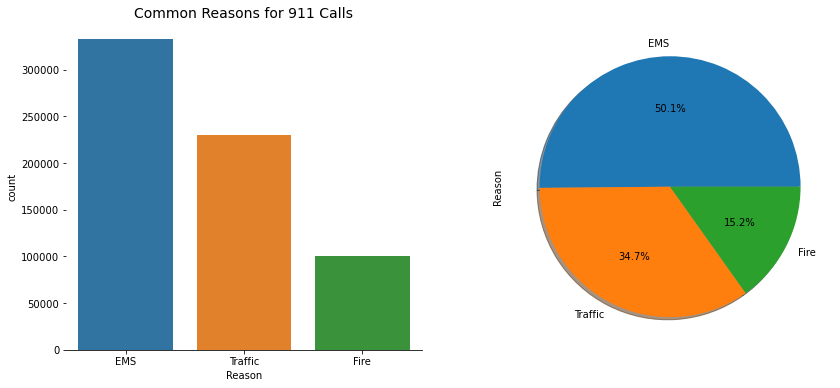

In [25]:
# show the data by figures
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.countplot(x='Reason', data=data_file, order=data_file['Reason'].value_counts().index, ax=axes[0])
sns.despine(bottom=False, left=True)
axes[0].set_title('Common Reasons for 911 Calls', size=14)


data_file['Reason'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, ax=axes[1])
plt.show()

### Emergency calls in each year
* There are more emergency calls in 2016 
* 

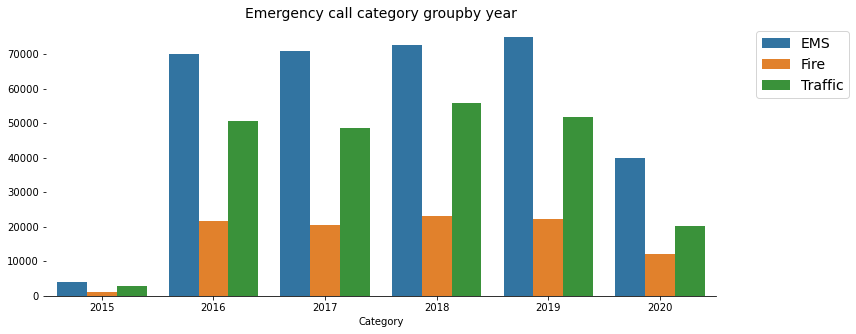

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x='Year', data=data_file, hue=data_file['Reason'])
sns.despine(bottom=False, left=True)
plt.title('Emergency call category groupby year', fontsize=14)
plt.xlabel('Category')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

### Emergency calls in each month

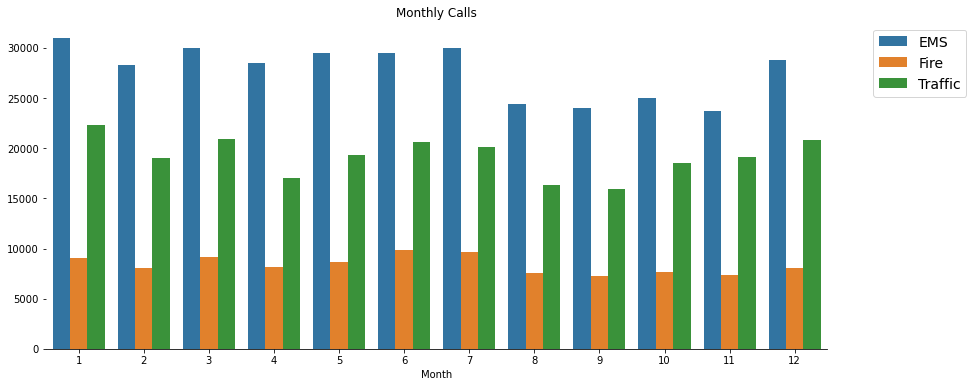

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(x='Month', data=data_file, hue='Reason')
sns.despine(bottom=False, left=True)
plt.title('Monthly Calls')
plt.xlabel('Month')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

### Emergency calls in each week

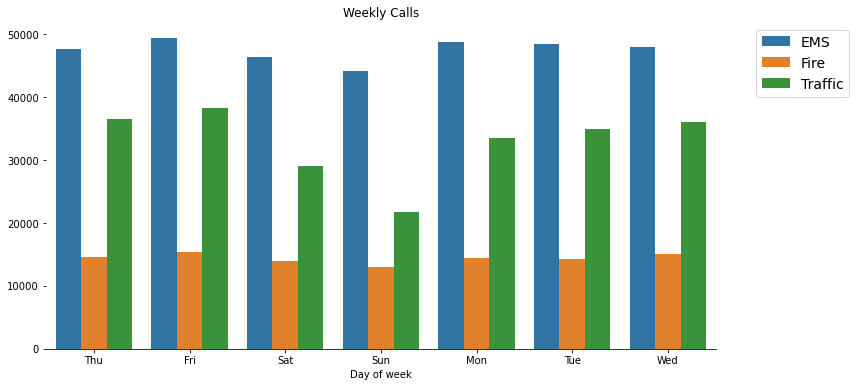

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='Day of Week', data=data_file, hue='Reason')
sns.despine(bottom=False, left=True)
plt.title('Weekly Calls')
plt.xlabel('Day of week')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

### Top 10 emergency calls from all categories
* Vehicle accident is the first reason for emergency calls
* Disabled Vehicle is the second reason for emergency calls
* Fire Alarm  is the third reason for emergency calls

In [29]:
pd.DataFrame(data_file['title'].value_counts().head(10)).style.background_gradient(cmap='Reds')

,title
Traffic: VEHICLE ACCIDENT -,148372
Traffic: DISABLED VEHICLE -,47909
Fire: FIRE ALARM,38336
EMS: FALL VICTIM,34676
EMS: RESPIRATORY EMERGENCY,34248
EMS: CARDIAC EMERGENCY,32332
EMS: VEHICLE ACCIDENT,25513
Traffic: ROAD OBSTRUCTION -,23235
EMS: SUBJECT IN PAIN,19646
EMS: HEAD INJURY,18301


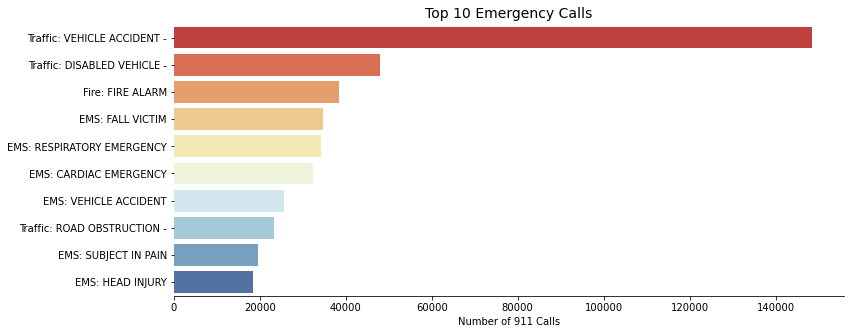

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(y='title', data=data_file, order=data_file['title'].value_counts().head(10).index, palette='RdYlBu')
sns.despine(bottom=False, left=True)
plt.title('Top 10 Emergency Calls', fontsize=14)
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.show()

### Emergency calls for each day by time series graph

In [31]:
group_by_day = data_file.groupby('Date').count()
group_by_day

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,station_code,Reason,Detail
Date,,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,73,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,254,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,257,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,241,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,260,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,237,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,208,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,245,329,329


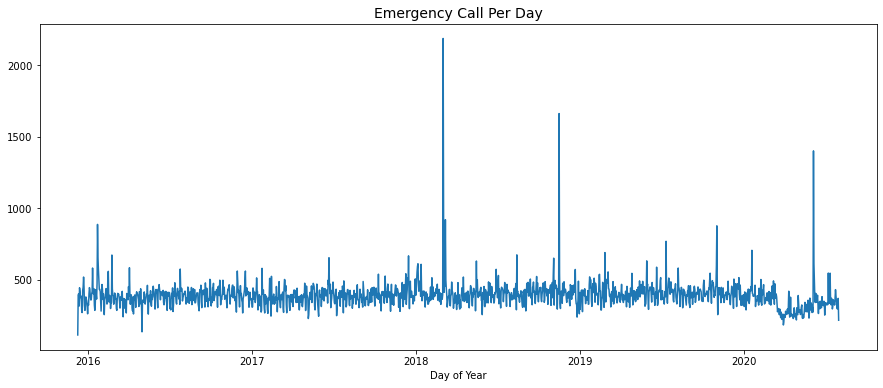

In [32]:
group_by_day['addr'].plot(figsize=(15,6))
plt.title('Emergency Call Per Day', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('')
plt.show()

In [33]:
byMonth = data_file.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Year,Date,station_code,Reason,Detail
Month,,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,40057,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,36421,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,39124,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,36617,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,38164,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,39391,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,39692,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,32008,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,31240,47213,47213


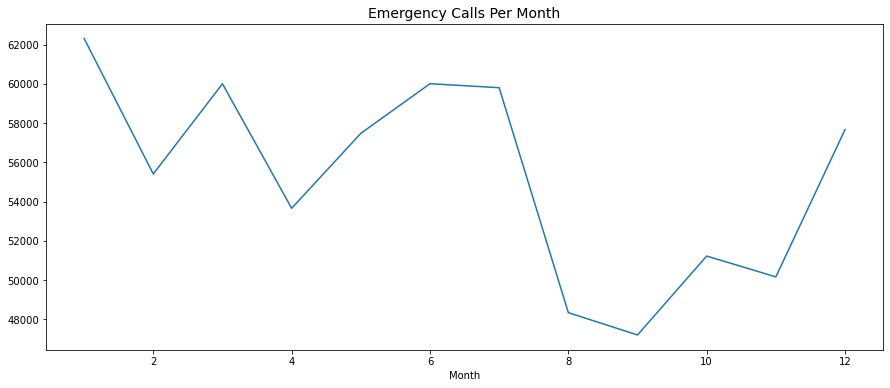

In [34]:
byMonth['twp'].plot(figsize=(15,6))
plt.title('Emergency Calls Per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('')
plt.show()

### Emergency calls in Traffic category 
* The top 5 reasons for emergency calls
   * Vehicle accident
   * Disabled vehicle
   * Road obstruction
   * Hazardous road conditions
   * Vehicle fire

In [35]:
# group the 'Traffic' category by reason
grouped_traffic = data_file[data_file['Reason']=='Traffic'].groupby('Detail').count().sort_values('Reason', ascending=True)
grouped_traffic

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,Date,station_code,Reason
Detail,,,,,,,,,,,,,,,
DEBRIS/FLUIDS ON HIGHWAY -,201,201,201,186,201,201,201,201,201,201,201,201,201,0,201
VEHICLE LEAKING FUEL -,292,292,292,245,292,292,292,292,292,292,292,292,292,0,292
VEHICLE FIRE -,3366,3366,3366,2316,3366,3366,3366,3366,3366,3366,3366,3366,3366,0,3366
HAZARDOUS ROAD CONDITIONS -,6833,6833,6833,6296,6833,6833,6832,6833,6833,6833,6833,6833,6833,0,6833
ROAD OBSTRUCTION -,23235,23235,23235,18507,23235,23235,23235,23235,23235,23235,23235,23235,23235,0,23235
DISABLED VEHICLE -,47909,47909,47909,36937,47909,47909,47907,47909,47909,47909,47909,47909,47909,0,47909
VEHICLE ACCIDENT -,148372,148372,148372,125114,148372,148372,148371,148372,148372,148372,148372,148372,148372,0,148372


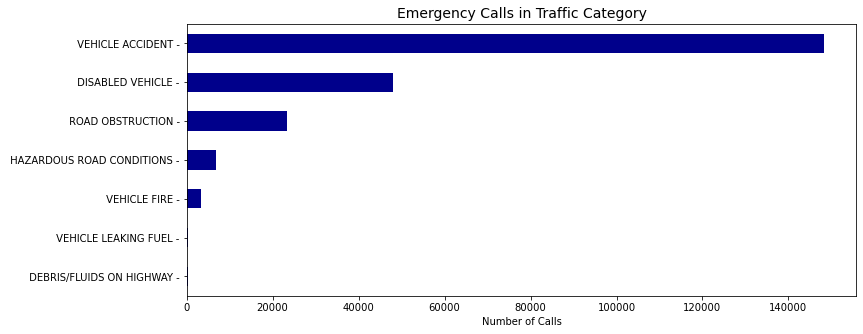

In [36]:
# show the data distribution by barplot
grouped_traffic['Reason'].plot(kind='barh', figsize=(12,5), color='darkblue')
plt.title('Emergency Calls in Traffic Category', fontsize=14)
plt.xlabel('Number of Calls')
plt.ylabel('')
plt.show()

In [37]:
# group the 'Traffic' category by date
traffic= data_file[data_file['Reason']=='Traffic'].groupby('Date').count()
traffic

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,station_code,Reason,Detail
Date,,,,,,,,,,,,,,,
2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,0,41,41
2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,0,137,137
2015-12-12,145,145,145,110,145,145,145,145,145,145,145,145,0,145,145
2015-12-13,75,75,75,53,75,75,75,75,75,75,75,75,0,75,75
2015-12-14,184,184,184,150,184,184,184,184,184,184,184,184,0,184,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,81,81,81,66,81,81,81,81,81,81,81,81,0,81,81
2020-07-26,88,88,88,76,88,88,88,88,88,88,88,88,0,88,88
2020-07-27,84,84,84,58,84,84,84,84,84,84,84,84,0,84,84


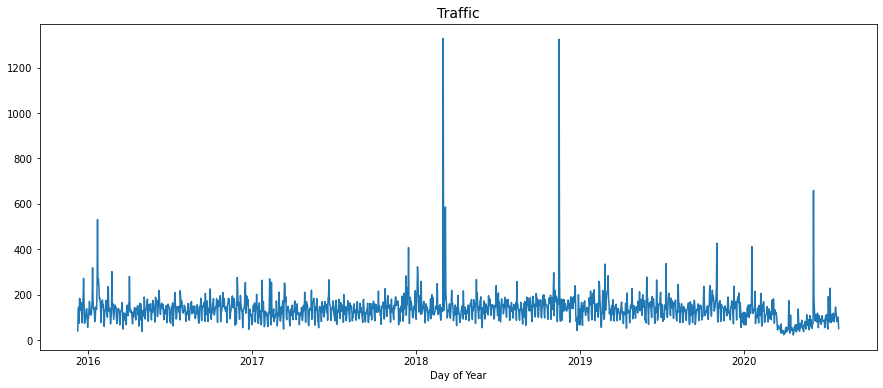

In [38]:
# Emergency calls in 'Traffic' on each day category by time series graph
traffic['addr'].plot(figsize=(15,6))
plt.title('Traffic', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('')
plt.show()

### Emergency calls in Fire category 
* The top 5 reasons for emergency calls
  * Fire alarm
  * Vehicle accident
  * Fire investigation
  * Gas-odor/leak
  * Building fire

In [39]:
# group the 'Fire' category by 'Reason'
grouped_fire = data_file[data_file['Reason']=='Fire'].groupby('Detail').count().sort_values('Reason', ascending=True).tail(10)
grouped_fire

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,Date,station_code,Reason
Detail,,,,,,,,,,,,,,,
WOODS/FIELD FIRE,2486,2486,2486,2169,2486,2486,2485,2486,2486,2486,2486,2486,2486,2486,2486
VEHICLE FIRE,3232,3232,3232,1928,3232,3232,3227,3232,3232,3232,3232,3232,3232,3232,3232
CARBON MONOXIDE DETECTOR,3990,3990,3990,3841,3990,3990,3990,3990,3990,3990,3990,3990,3990,3990,3990
FIRE SPECIAL SERVICE,4050,4050,4050,3769,4050,4050,4048,4050,4050,4050,4050,4050,4050,4050,4050
BUILDING FIRE,4754,4754,4754,4493,4754,4754,4753,4754,4754,4754,4754,4754,4754,4754,4754
ELECTRICAL FIRE OUTSIDE,5111,5111,5111,4503,5111,5111,5110,5111,5111,5111,5111,5111,5111,5111,5111
GAS-ODOR/LEAK,6740,6740,6740,6114,6740,6740,6738,6740,6740,6740,6740,6740,6740,6740,6740
FIRE INVESTIGATION,9444,9444,9444,8948,9444,9444,9441,9444,9444,9444,9444,9444,9444,9444,9444
VEHICLE ACCIDENT,10864,10864,10864,6693,10864,10864,10828,10864,10864,10864,10864,10864,10864,10864,10864


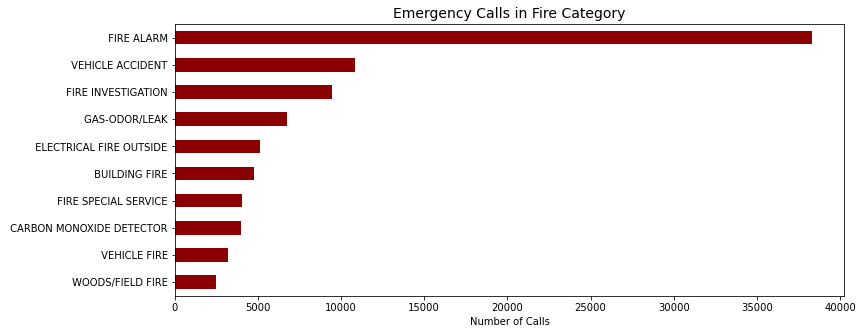

In [40]:
# Top 10 reasons for emergency calls
grouped_fire['Reason'].plot(kind='barh', figsize=(12,5), color='darkred')
plt.title('Emergency Calls in Fire Category', fontsize=14)
plt.xlabel('Number of Calls')
plt.ylabel('')
plt.show()

In [41]:
fire = data_file[data_file['Reason']=='Fire'].groupby('Date').count()
fire

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,station_code,Reason,Detail
Date,,,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15
2015-12-11,68,68,68,59,68,68,68,68,68,68,68,68,68,68,68
2015-12-12,69,69,69,54,69,69,69,69,69,69,69,69,69,69,69
2015-12-13,50,50,50,47,50,50,50,50,50,50,50,50,50,50,50
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,56,56,56,40,56,56,56,56,56,56,56,56,56,56,56
2020-07-26,45,45,45,42,45,45,45,45,45,45,45,45,45,45,45
2020-07-27,61,61,61,57,61,61,61,61,61,61,61,61,61,61,61


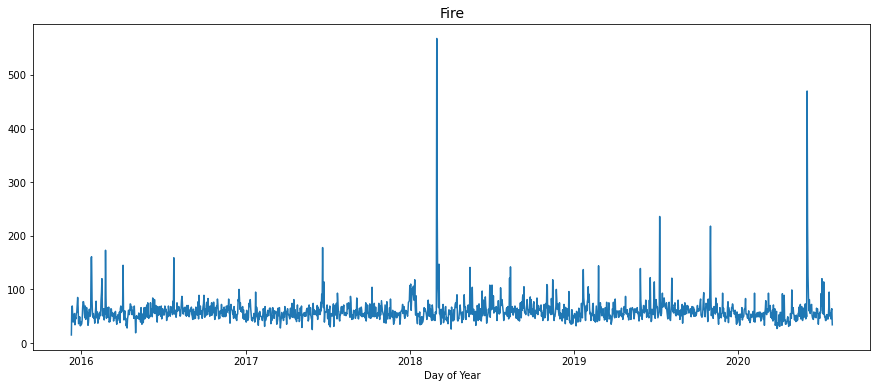

In [42]:
# Emergency calls in 'Fire' category on each day by time series graph
fire['addr'].plot(figsize=(15,6))
plt.title('Fire', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('')
plt.show()

### Emergency calls in EMS category 
* The top 5 reasons for emergency calls
  * Respiratory emergency
  * Cardiac emergency
  * Fall victim
  * Vehicle Accident
  * Subject in pain

In [43]:
# group the 'EMS' category
grouped_EMS = data_file[data_file['Reason']=='EMS'].groupby('Detail').count().sort_values('Reason', ascending=True).tail(10)
grouped_EMS

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,Date,station_code,Reason
Detail,,,,,,,,,,,,,,,
UNKNOWN MEDICAL EMERGENCY,10698,10698,10698,9580,10698,10698,10668,10698,10698,10698,10698,10698,10698,10698,10698
SYNCOPAL EPISODE,10806,10806,10806,10120,10806,10806,10803,10806,10806,10806,10806,10806,10806,10806,10806
SEIZURES,10823,10823,10823,10135,10823,10823,10819,10823,10823,10823,10823,10823,10823,10823,10823
GENERAL WEAKNESS,11867,11867,11867,11242,11867,11867,11865,11867,11867,11867,11867,11867,11867,11867,11867
HEAD INJURY,18301,18301,18301,17421,18301,18301,18298,18301,18301,18301,18301,18301,18301,18301,18301
SUBJECT IN PAIN,19646,19646,19646,18599,19646,19646,19640,19646,19646,19646,19646,19646,19646,19646,19646
VEHICLE ACCIDENT,25513,25513,25513,15770,25513,25513,25462,25513,25513,25513,25513,25513,25513,25513,25513
CARDIAC EMERGENCY,32332,32332,32332,30487,32332,32332,32322,32332,32332,32332,32332,32332,32332,32332,32332
RESPIRATORY EMERGENCY,34248,34248,34248,32498,34248,34248,34239,34248,34248,34248,34248,34248,34248,34248,34248


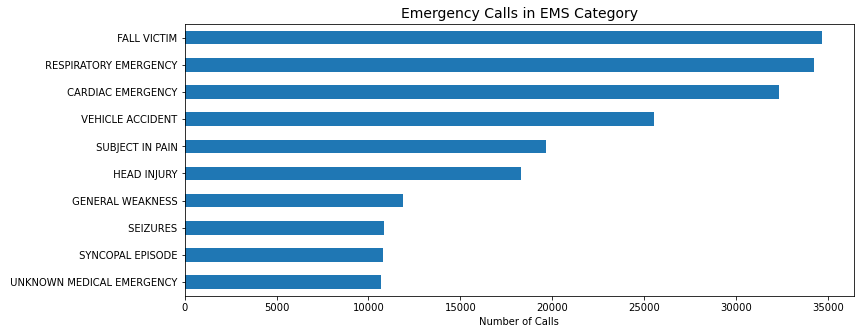

In [44]:
# Top 10 reasons for emergency calls
grouped_EMS['Reason'].plot(kind='barh', figsize=(12,5))
plt.title('Emergency Calls in EMS Category',  fontsize=14)
plt.xlabel('Number of Calls')
plt.ylabel('')
plt.show()

In [45]:
EMS = data_file[data_file['Reason']=='EMS'].groupby('Date').count()
EMS

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,Day of Week,Month,Year,station_code,Reason,Detail
Date,,,,,,,,,,,,,,,
2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58,58,58
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186,186
2015-12-12,188,188,188,170,188,188,188,188,188,188,188,188,188,188,188
2015-12-13,191,191,191,179,191,191,191,191,191,191,191,191,191,191,191
2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221,221,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,181,181,181,165,181,181,181,181,181,181,181,181,181,181,181
2020-07-26,163,163,163,153,163,163,163,163,163,163,163,163,163,163,163
2020-07-27,184,184,184,173,184,184,184,184,184,184,184,184,184,184,184


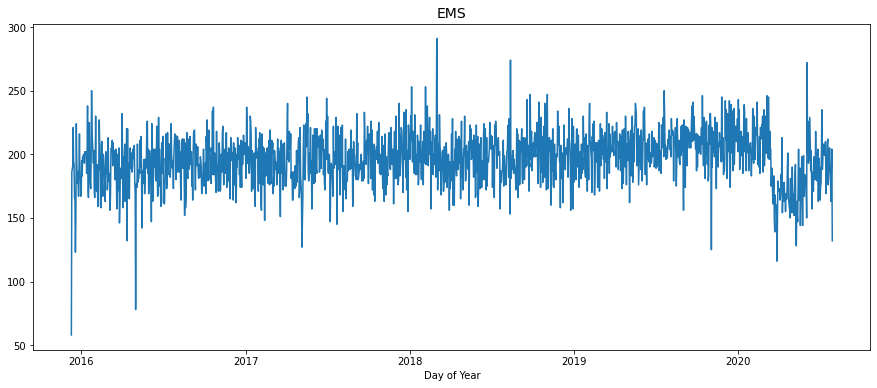

In [46]:
# Emergency calls in 'Fire' category on each day by time series graph
EMS['addr'].plot(figsize=(15,6))
plt.title('EMS', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('')
plt.show()

### Top 10 called stations for emergency

In [47]:
station = pd.DataFrame(data_file['station_code'].value_counts().head(10)).style.background_gradient(cmap='Reds')
station

,station_code
308A,25346
329,21895
313,20325
381,15949
345,14504
308,13963
351,12705
345B,12165
317,11802
382,11169


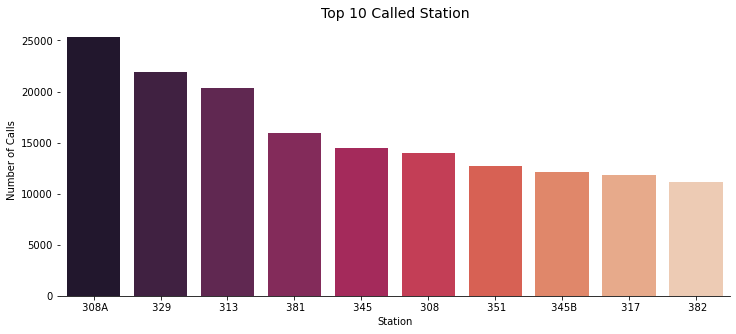

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x='station_code', data=data_file, order=data_file['station_code'].value_counts().head(10).index, palette='rocket')
sns.despine(bottom=False, left=True)
plt.title('Top 10 Called Station', fontsize=14)
plt.xlabel('Station')
plt.ylabel('Number of Calls')
plt.show()

### Heatmaps

In [49]:
DayMonth = data_file.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
DayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


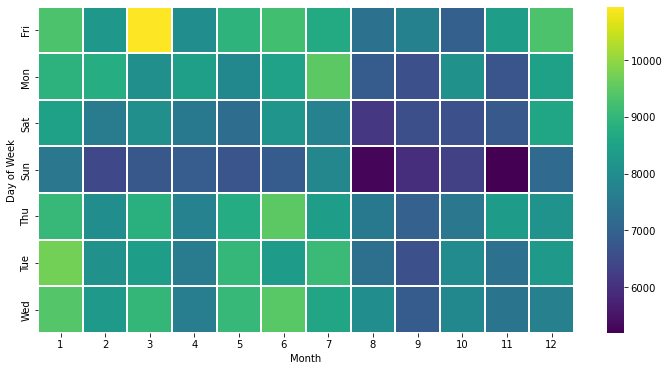

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth,cmap='viridis', linewidth=0.1)
plt.show()

<Figure size 576x360 with 0 Axes>

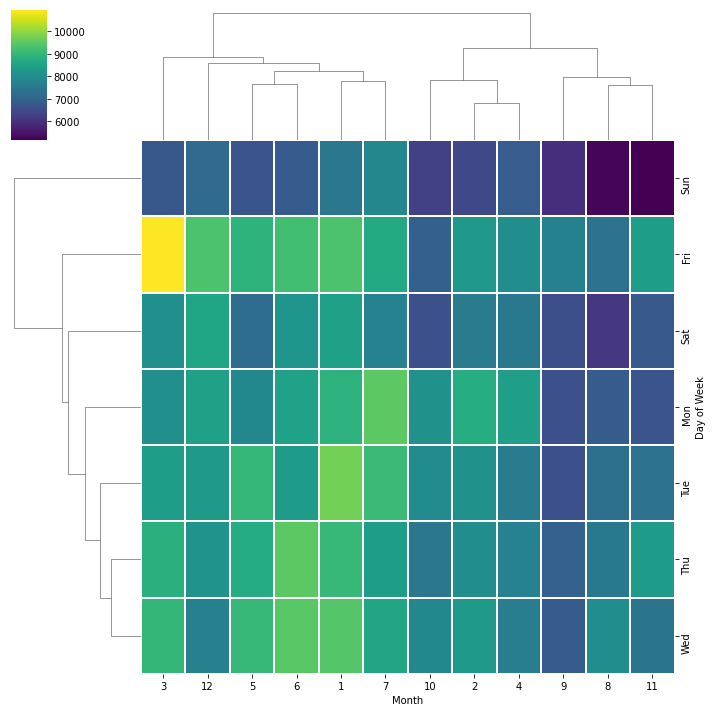

In [51]:
plt.figure(figsize=(8,5))
sns.clustermap(DayMonth,cmap='viridis', linewidth=0.1)
plt.show()

In [52]:
DayHour = data_file.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
DayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


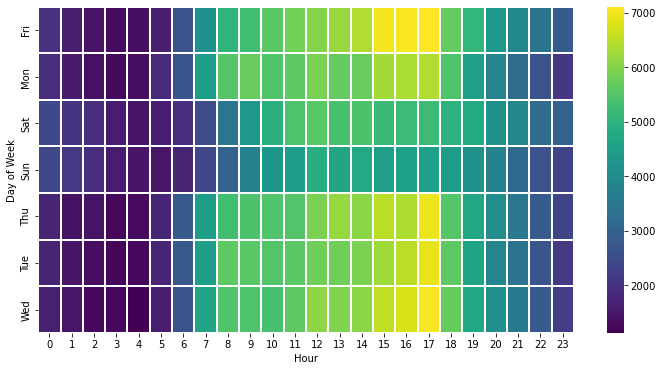

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour,cmap='viridis', linewidth=0.1)
plt.show()

<Figure size 576x360 with 0 Axes>

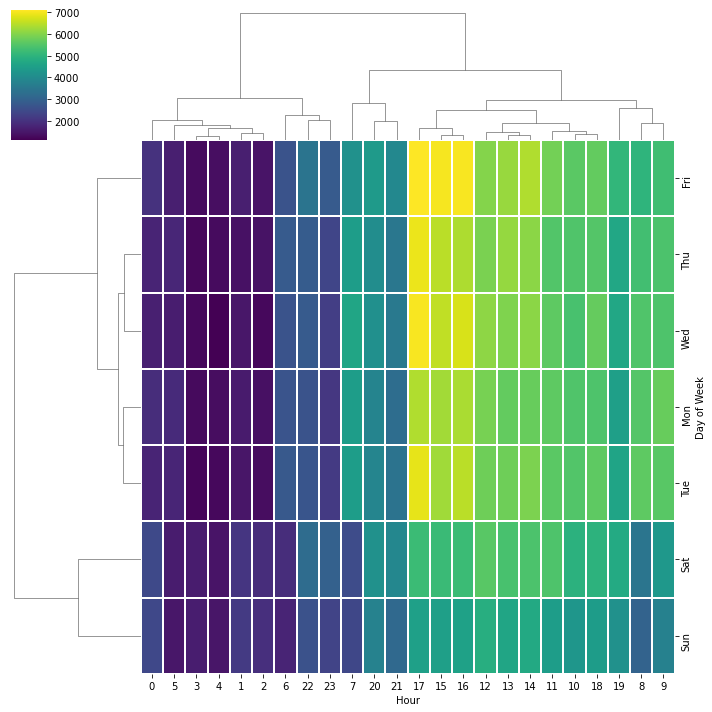

In [54]:
plt.figure(figsize=(8,5))
sns.clustermap(DayHour,cmap='viridis', linewidth=0.1)
plt.show()

## Great Job !